# Chapter 3   
***  
# MNIST

In [93]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [95]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

#### fetch_openml  
<font color=pink>DESCR</font> - describing the dataset.  
<font color=pink>data</font>  - containing an array with one row per instance and one column per feature.  
<font color=pink>target</font> - containing an array with the labels.
<br>  
<font color=gray><font color=pink>DESCR</font> - 데이터셋 설명  
<font color=pink>data</font>  - (샘플, 특성)배열을 가진 데이터  
<font color=pink>target</font> - 레이블 열 데이터</font>

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

 - 70,000 images, and each image has 784 features (28x28)   
 each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black)   
 <br>
 - <font color=gray> 70,000개의 이미지와 각 이미지는 784개의 특성(28x28 픽셀)</font>

In [4]:
X, y = mnist["data"], mnist["target"]
# X MNIST data, y MNIST target
X.shape

(70000, 784)

In [5]:
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [6]:
mnist['feature_names']

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [7]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [8]:
y.shape

(70000,)

In [9]:
y[:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

Saving figure some_digit_plot


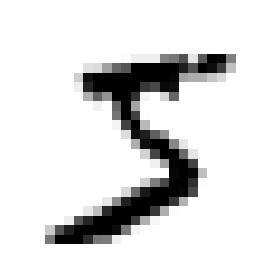

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
# 28x28 pixels
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [11]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [12]:
print(y[0],y[1],y[2])

5 0 4


In [13]:
y = y.astype(np.uint8)
# string to integer
# y = y.astype(np.object) to object -> '5'

In [14]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [15]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

# Training a Binary Classifier  
***  
MNIST dataset is actually already split into a training set.  
training set is already shuffled for us.

In [16]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [17]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

In [18]:
y_train_5

array([ True, False, False, ...,  True, False, False])

#### sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
 - hyperparameters default max_iter=1000, tol=1e-3
 - Stochastic Gradient Descent (SGD) classifier
 - advantage of handling very large datasets efficiently.
 - deals with training instances independently, one at a time( SGD well suited for online learning)

In [19]:
from sklearn.linear_model import SGDClassifier

# sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
sgd_clf.predict([some_digit])
# guessed right -> some_digit = 5

array([ True])

# Performance Measures  
***  
## Measuring Accuracy Using Cross-Validation

 - following code does roughly the same thing as Scikit-Learn’s <font color=pink>cross_val_score()</font> function, and it prints the same result:  
  - <font color=pink>StratifiedKFold</font> class performs stratified sampling.  
  - At each iteration the code creates a clone of the classifier,   
  - trains that clone on the training folds,  
  - makes predictions on the test fold.   
  - Then it counts the number of correct predictions and outputs the ratio of correct predictions.

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

/Users/j/handsonml/my_env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.95035
0.96035
0.9604


#### cross_val_score(estimator, x, y, cv, scoring)
<font color=pink>estimator</font> - object to use to fit the data.  
<font color=pink>cv</font> - default 5-fold cross validation,  
<font color=pink>scoring</font> - https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter  
'accuracy'  
 
$ \hat{y} $ is the predicted, $y$ is true value
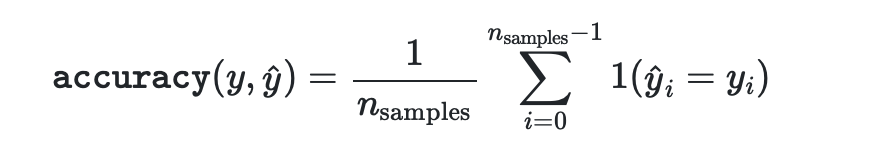

<br>  
<font color=gray> 두개 단순 비교 [1,2,3,4] [1,3,2,4] -> 2/4</font>

In [22]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

- classifier that just classifies every single image in the “not-5” class:

In [23]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
#         pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [24]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [25]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

-  over 90% accuracy! simply because only about 10% of the images are 5s,  
- This demonstrates why <font color=green>accuracy is generally not the preferred </font>performance measure for classifiers, especially when you are dealing with skewed datasets

# Confusion Matrix
general idea is to count the number of times instances of class A are classified as class B  
- need to have a set of predictions so that they can be compared to the actual targets.  

<br>  
#### cross_val_predict()
 instead of returning the evaluation scores, it returns the predictions made on each test fold.  
 sgd_clf = SGDClassifier(random_state=42)

In [27]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [28]:
#([[53892,   687],    ([[true -,   false +],
# [ 1891,  3530]])     [ false -, true +]])
# precision = TP/(TP+FP)
# TPR = recall = sensitivity = TP/(TP+FN)
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

precision =$  \frac{TP}{TP+FP}$   
recall = sensitivity = true positive rate (TPR) = $  \frac{TP}{TP+FN}$ 
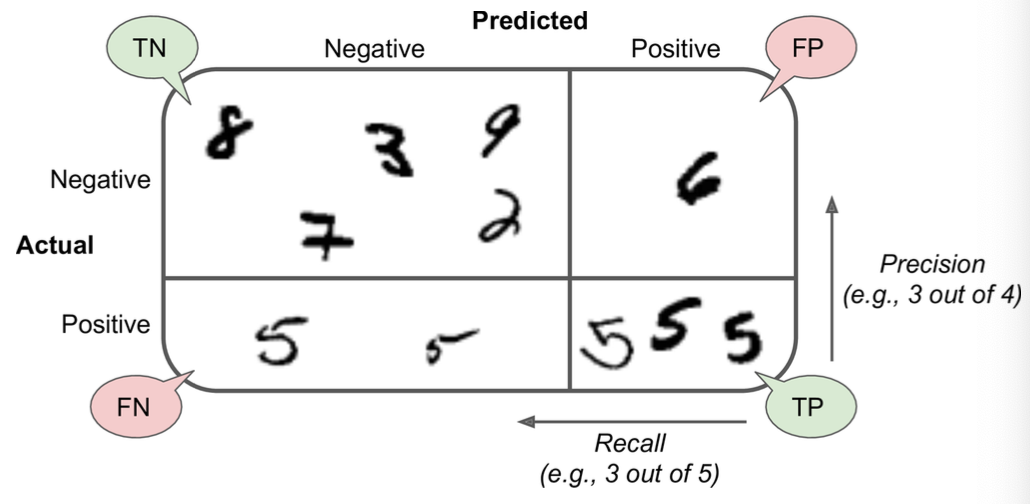

In [29]:
# 가정
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

# Precision and Recall  
***  


In [30]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [31]:
#([[53892,   687],    ([[true -,   false +],
# [ 1891,  3530]])     [ false -, true +]])
3530/(3530+687)

0.8370879772350012

In [32]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [33]:
#([[53892,   687],    ([[true -,   false +],
# [ 1891,  3530]])     [ false -, true +]])
3530/(3530+1891)

0.6511713705958311

### F1 Score 
 - Harmonic mean of precision and recall  
 - harmonic mean gives much more weight to low values.  
 - <font color=pink>f1_score</font>
 <br>  
 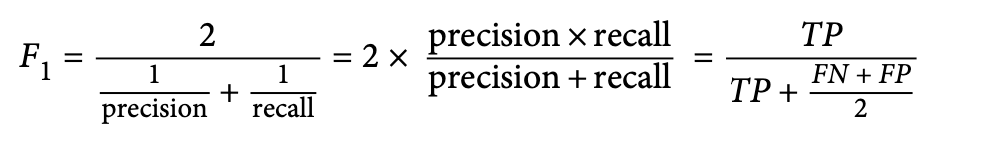

In [34]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [35]:
(0.6511713705958311+0.8370879772350012)/2

0.7441296739154162

In [36]:
# 2ab/(a+b) = 2/((1/a)+(1/b))
# harmonic mean gives much more weight to low values
(2*(0.6511713705958311*0.8370879772350012))/(0.6511713705958311+0.8370879772350012)

0.7325171197343846

# Precision/Recall Trade-off  
***  
 - a classifier that rejects many good videos (low recall) but keeps only safe ones (high precision).  
 - a classifier that has a much (higher recall) but lets a few really bad videos show up in your product(low precision).    
 
 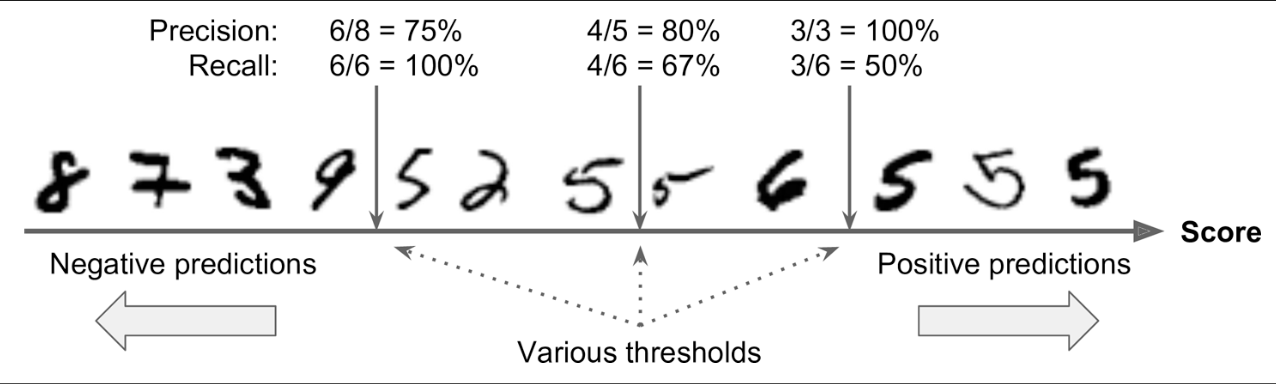  
 - lowest score on the left to the highest score on the right.
 - <font color=pink>SGDClassifier</font> it computes a score based on a decision function
 - above the chosen decision threshold are considered positive; the  <font color=green>higher the threshold, the lower the recall</font>  
 - <font color=pink>decision_function()</font> method, which returns a score for each instance, and then use any threshold you want to make predictions based on those scores:

In [37]:
# SGD Classifier
# some_digit = X[0] = 5
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [38]:
y_scores.shape

(1,)

In [39]:
y_scores

array([2164.22030239])

In [40]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [41]:
y_some_digit_pred

array([ True])

In [42]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

#### which threshold to use?  
***
Precision and recall <font color=green>vs</font> the decision threshold

In [43]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [44]:
# y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
# y_test_5 = (y_test == 5)
y_train_5

array([ True, False, False, ...,  True, False, False])

In [45]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# y_scores = sgd_clf.decision_function([some_digit]) -> array([2164.22030239])
# y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
# y_train_5 = (y_train == 5)  -> array([ True, False, False, ...,  True, False, False])

In [47]:
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
print(recall_90_precision)

0.4799852425751706


In [48]:
np.argmax(precisions >= 0.90)

57075

In [49]:
precisions

array([0.09040123, 0.09038606, 0.09038757, ..., 1.        , 1.        ,
       1.        ])

In [50]:
precisions.shape

(59967,)

In [51]:
precisions >= 0.90

array([False, False, False, ...,  True,  True,  True])

Saving figure precision_recall_vs_threshold_plot


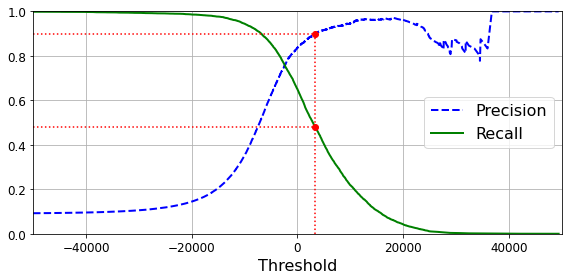

In [52]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown

#함수
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

#### plot precision directly against recall  
***  


In [53]:
(y_train_pred == (y_scores > 0)).all()

True

In [54]:
# y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [55]:
y_scores #array([  1200.93051237, -26883.79202424, -33072.03475406, ..., 13272.12718981,  -7258.47203373, -16877.50840447])

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

#### Precision versus recall   
***
 - precision really starts to fall sharply around 80% recall.   
 You will probably want to select a precision/recall <font color=green>trade-off just before that drop</font>  
 - high-precision classifier is not very useful if its recall is too low!

Saving figure precision_vs_recall_plot


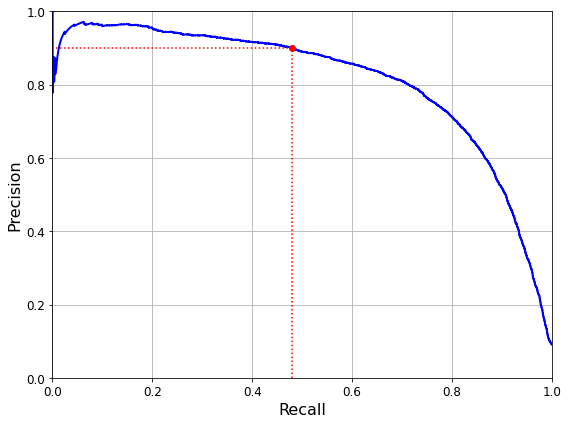

In [56]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4799, 0.4799], [0., 0.9], "r:")
plt.plot([0.0, 0.4799], [0.9, 0.9], "r:")
plt.plot([0.4799], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

#### np.argmax()  
will give you the first index of the maximum value, which in this case means the first True value

In [57]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [58]:
threshold_90_precision

3370.0194991439557

In [59]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [60]:
# high-precision classifier is not very useful if its recall is too low.
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [61]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

# The ROC Curve  
***  
receiver operating characteristic (ROC)  
 - tool used with binary classifiers.    
 - very similar to the precision/recall curve,
 - ROC curve plots the true positive rate(TRP, recall) <font color=green>vs</font> false positive rate (FPR).   
 - ROC curve plots sensitivity(TRP,recall) <font color=green>vs</font> (1 – specificity(TNR)).
 <br>
 - FPR is the ratio of negative instances that are incorrectly classified as positive.  
 <br>
 - (1 – the true negative rate(TNR)) = FPR 
  - which is the ratio of negative instances that are correctly classified as negative.  
  - TNR = specificity  

<br>

#### roc_curve()  
 - compute the TPR and FPR for various threshold values:  
 - One way to compare classifiers is to measure the <font color=green>area under the curve (AUC)</font>.   
  - A perfect classifier will have a ROC AUC equal to 1.  

<br>  
 - you should prefer the <font color=green>PR curve</font> whenever the positive class is rare or when you care more about the false positives than the false negatives.   
 Otherwise, use the <font color=green>ROC curve</font>.

In [62]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


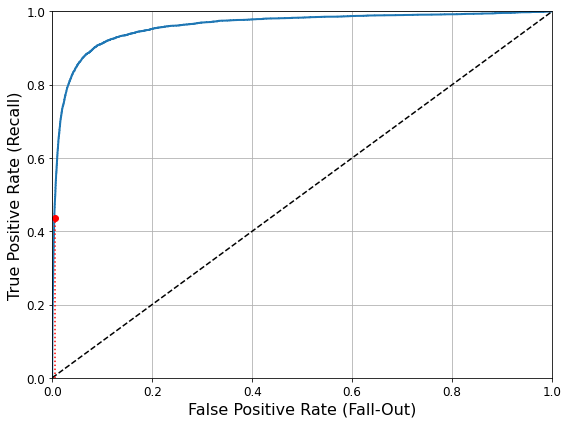

In [63]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
save_fig("roc_curve_plot")                         # Not shown
plt.show()

In [64]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)


# y_train_5 = (y_train == 5)  -> array([ True, False, False, ...,  True, False, False])
# y_scores -> array([1200.93051237, -26883.79202424, -33072.03475406, ..., 13272.12718981,  -7258.47203373, -16877.508404

0.9604938554008616

 - train a <font color=pink>RandomForestClassifier</font> and compare its <font color=green>ROC curve</font>  and  <font color=green>ROC AUC scoree</font>to those of the SGDClassifier.  

#### predict_proba() method 
 - returns an array containing a row per instance and a column per class,   
 each containing the probability that the given instance belongs to the given class  
 (e.g., 70% chance that the image represents a 5):

In [65]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [66]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Saving figure roc_curve_comparison_plot


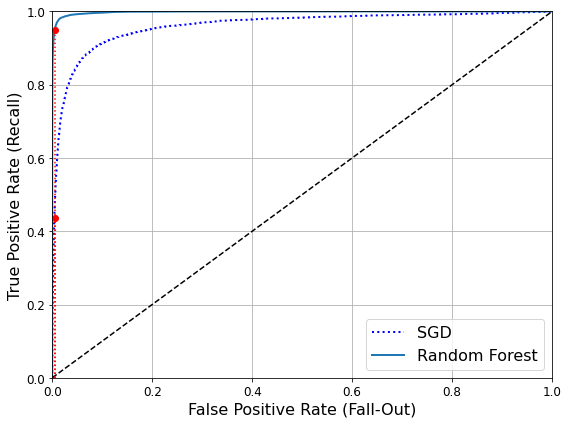

In [67]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

 - <font color=pink>Random Forest classifier</font> is superior to the  <font color=pink>SGD classifier</font> because its <font color=green>ROC curve is much closer to the top-left corner, and it has a greater AUC</font>

In [68]:
# roc_auc_score
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [69]:
# precision
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [70]:
# recall
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

# Multiclass Classification  
***  
multiclass classifiers (also called multinomial classifiers)  
 - <font color=green>SGD classifiers, Random Forest classifiers, and naive Bayes classifiers</font> are capable of handling multiple classes natively.  
 - Logistic Regression or Support Vector Machine classifiers are <font color=green>strictly binary classifiers</font>.  
   
<br>  
 - digit images into 10 classes (from 0 to 9)  
  - is to train 10 binary classifiers: called the <font color=green>one-versus-the-rest (OvR)</font> strategy.  
  (also called one-versus-all).  
  - train a binary classifier for every pair of digits:   
  one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on. This is called the <font color=green>one-versus-one (OvO)</font> strategy   
    - N classes, need to train $ \frac{N ×(N – 1)}{2}$ classifiers.  
    - main advantage of OvO: each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish.   
  - Support Vector Machine classifiers scale poorly with the size of the training set. For these algorithms<font color=green> OvO is preferred</font>  
  - it is <font color=green>faster to train many classifiers on small training sets</font> than to train few classifiers on large training sets. For most binary classification algorithms, however, <font color=green>OvR is preferred</font>.
  


 - Scikit-Learn detects when you try to use a binary classification for a multi‐class classification task  
  - <font color=green>automatically runs OvR or OvO</font>, depending on the algorithm.  
 
<br>  
Scikit-Learn actually used the OvO strategy: it trained 45 binary classifiers

In [71]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train, not y_train_5
svm_clf.predict([some_digit])

array([5], dtype=uint8)

#### decision_function()
returns 10 scores per instance (instead of just 1)

In [72]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [73]:
np.argmax(some_digit_scores)

5

#### classes_
 - When a classifier is trained, it stores the list of target classes in its classes_ attribute.  
 - the class at index 5 happens to be class 5

In [74]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [75]:
svm_clf.classes_[5]

5

#### OneVsOneClassifier or OneVsRestClassifier classes.  
 - this code creates a multiclass classifier using the OvR strategy, based on an SVC:

In [76]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [77]:
len(ovr_clf.estimators_)

10

 - did not have to run OvR or OvO   
 because SGD classifiers can directly classify instances into multiple classes. 

In [78]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

#### decision_function() method   
 - now returns one value per class.

In [79]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

#### cross_val_score() 
 - evaluate this classifier.  
 - evaluate the SGDClassifier’s accuracy  
<br>
 - If you used a random classifier, you would get 10% accuracy,  
 -  Simply scaling the inputs (<font color=green>Chapter 2</font>) increases accuracy above 89%:

In [80]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

# Appendix B  
***
# Machine Learning project checklist   
***  


 ## Error Analysis  
***  
 - try out multiple models (shortlisting the best ones and fine-tuning their hyperparameters using GridSearchCV),  
 - automate as much as possible.  
 - One way to do this is to analyze the types of errors it makes.

In [82]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

In [83]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure confusion_matrix_plot


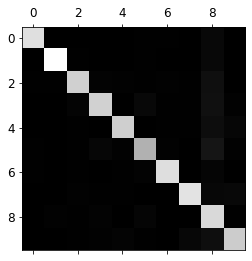

In [84]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

 - 5s look slightly darker than the other digits  
  - mean that there are fewer images of 5s in the dataset or that the classifier does not perform as well on 5s as on other digits

 - First, you need to divide each value in the confusion matrix by the number of images in the corresponding class   
 - $ \frac {value\ in\ the\ confusion\ matrix}{the\ number\ of\ images\ in\ the corresponding\ class} $

In [89]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Saving figure confusion_matrix_errors_plot


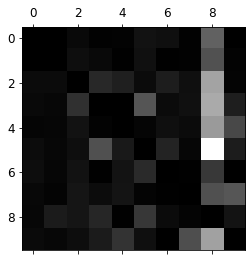

In [90]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

columns represent predicted classes  
rows represent actual classes  

<br>  
column for class 8 is quite bright  
which tells you that many images get misclassified as 8s
 - Analyzing the confusion matrix often gives you insights into ways to improve your classifier

Saving figure error_analysis_digits_plot


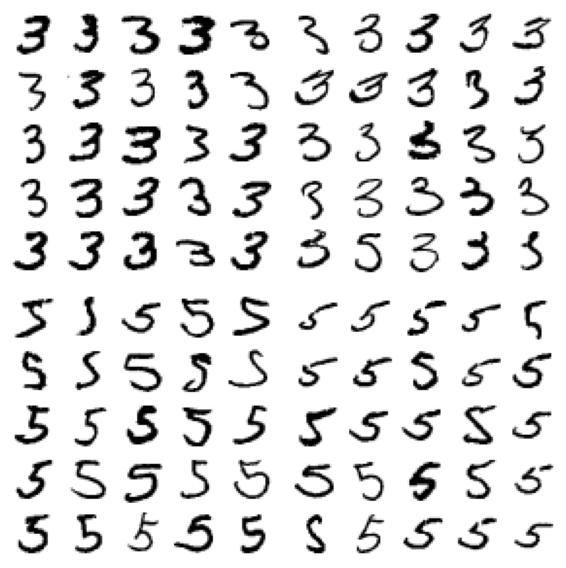

In [96]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

# Multilabel Classification
***  
In some cases you may want your classifier to output multiple classes for each instance.  

<br>
 
 - code creates a y_multilabel array containing two target labels for each digit image:

In [97]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)    # whether or not the digit is large (7, 8, or 9)
y_train_odd = (y_train % 2 == 1)    # or not it is odd.
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()    #  create a KNeighborsClassifier instance 
knn_clf.fit(X_train, y_multilabel)    # we train it using the multiple targets array

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [98]:
knn_clf.predict([some_digit])    # make a prediction, [False,  True],
# Not large (False) and odd (True).

array([[False,  True]])

In [100]:
# measure the F1 score for each individual label, then simply compute the average score.
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

## Multioutput Classification
***  
multioutput– multiclass classification  


In [101]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Saving figure noisy_digit_example_plot


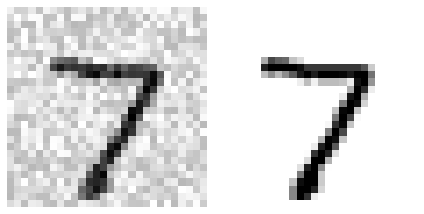

In [102]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

left is the noisy input image,   
right is the clean target image

 train the classifier and make it clean this image:

Saving figure cleaned_digit_example_plot


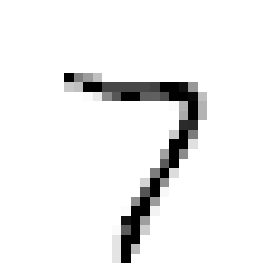

In [103]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")